In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report


In [17]:
#1.	Phishing URL Detection Model
# Load phishing URL dataset
url_data = pd.read_csv(
    r"C:\Users\Rimsh\Desktop\AI_ROOM\Datasets\phishing_site_urls.csv"
)

# Display first 5 rows
url_data.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:
# Convert labels to numeric form
url_data['Label'] = url_data['Label'].map({'bad': 1, 'good': 0})

# Check result
url_data.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1


In [9]:
# Separate features and labels
X = url_data['URL']
y = url_data['Label']

# Convert URLs into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

# Check feature shape
X_features.shape


(549346, 528563)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42
)

# Check sizes
X_train.shape, X_test.shape


((439476, 528563), (109870, 528563))

In [13]:
# Train Logistic Regression model
phishing_url_model = LogisticRegression(max_iter=1000)
phishing_url_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[77860   810]
 [ 4023 27177]]


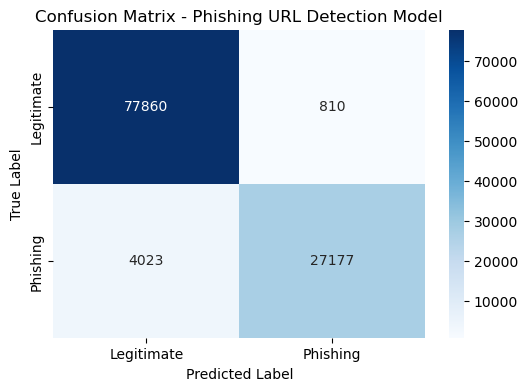

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Phishing URL Detection Model")
plt.show()


In [15]:
# Predict on test data
y_pred = phishing_url_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Phishing URL Model Accuracy:", accuracy)

# Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Phishing URL Model Accuracy: 0.9560116501319742

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     78670
           1       0.97      0.87      0.92     31200

    accuracy                           0.96    109870
   macro avg       0.96      0.93      0.94    109870
weighted avg       0.96      0.96      0.96    109870



In [21]:
import joblib
import os

# Define model save path
model_path = r"C:\Users\Rimsh\Desktop\AI_ROOM\MODELS"

# Create folder if it doesn't exist
os.makedirs(model_path, exist_ok=True)

# Save phishing URL detection model
joblib.dump(phishing_url_model, os.path.join(model_path, "phishing_url_model.pkl"))

# Save TF-IDF vectorizer
joblib.dump(vectorizer, os.path.join(model_path, "url_vectorizer.pkl"))

print("Models saved successfully in MODELS folder.")


Models saved successfully in MODELS folder.


In [ ]:
#2.2.	PHISHING WEBSITE FEATURES

In [27]:
# Load phishing website features dataset
website_data = pd.read_csv(
    r"C:\Users\Rimsh\Desktop\AI_ROOM\Datasets\phishing-website-dataset.csv"
)

# View first 5 rows
website_data.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [29]:
# Separate features and target label
X = website_data.drop(['Result'], axis=1)
y = website_data['Result']

# Check shapes
X.shape, y.shape


((11055, 31), (11055,))

In [31]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check split sizes
X_train.shape, X_test.shape


((8844, 31), (2211, 31))

In [33]:
# Train Random Forest model
phishing_website_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

phishing_website_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Predict on test data
y_pred = phishing_website_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Phishing Website Model Accuracy:", accuracy)

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Phishing Website Model Accuracy: 0.9678878335594754

Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [37]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 907   49]
 [  22 1233]]


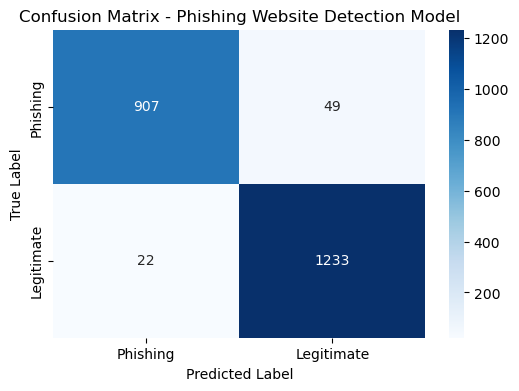

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Phishing', 'Legitimate'],
    yticklabels=['Phishing', 'Legitimate']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Phishing Website Detection Model")
plt.show()


In [41]:
import joblib
import os

model_path = r"C:\Users\Rimsh\Desktop\AI_ROOM\MODELS"

# Save phishing website model
joblib.dump(phishing_website_model, os.path.join(model_path, "phishing_website_model.pkl"))

print("Phishing website model saved successfully.")


Phishing website model saved successfully.


In [45]:
# Load password strength dataset safely
pwd_data = pd.read_csv(
    r"C:\Users\Rimsh\Desktop\AI_ROOM\Datasets\password-strength-classifier-dataset.csv",
    engine="python",
    on_bad_lines="skip"
)

# View first 5 rows
pwd_data.head()


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [47]:
pwd_data['strength'].value_counts()


strength
1    496801
0     89702
2     83137
Name: count, dtype: int64

In [49]:
pwd_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)


In [55]:
# Remove rows with missing passwords
pwd_data = pwd_data.dropna(subset=['password'])

# Ensure password column is string type
pwd_data['password'] = pwd_data['password'].astype(str)

# Re-define features and labels CLEANLY
X_pwd = pwd_data['password']
y_pwd = pwd_data['strength']

# Apply character-level TF-IDF
pwd_vectorizer = TfidfVectorizer(analyzer='char')
X_pwd_features = pwd_vectorizer.fit_transform(X_pwd)

# Check shapes
X_pwd_features.shape, y_pwd.shape


((669639, 153), (669639,))

In [57]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_pwd_features,
    y_pwd,
    test_size=0.2,
    random_state=42,
    stratify=y_pwd
)

# Check split sizes
X_train.shape, X_test.shape


((535711, 153), (133928, 153))

In [59]:
# Train Logistic Regression with class weighting
password_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

password_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [61]:
# Predict on test data
y_pred = password_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Password Strength Model Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Password Strength Model Accuracy: 0.7284735081536348

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.84      0.56     17940
           1       0.94      0.68      0.79     99360
           2       0.57      0.89      0.69     16628

    accuracy                           0.73    133928
   macro avg       0.64      0.80      0.68    133928
weighted avg       0.82      0.73      0.75    133928



Confusion Matrix:
[[15058  2843    39]
 [20412 67623 11325]
 [  233  1513 14882]]


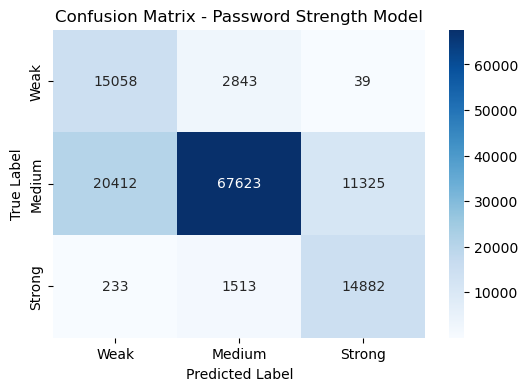

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Weak', 'Medium', 'Strong'],
    yticklabels=['Weak', 'Medium', 'Strong']
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Password Strength Model")
plt.show()


In [65]:
import joblib
import os

model_path = r"C:\Users\Rimsh\Desktop\AI_ROOM\MODELS"

# Save password strength model
joblib.dump(password_model, os.path.join(model_path, "password_strength_model.pkl"))

# Save password vectorizer
joblib.dump(pwd_vectorizer, os.path.join(model_path, "password_vectorizer.pkl"))

print("Password strength model and vectorizer saved successfully.")


Password strength model and vectorizer saved successfully.
